In [ ]:
# Employee salary prediction using adult csv

#Loading required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

In [ ]:
# Data input
df= pd.read_csv('./dataset/adult.csv')

In [3]:
# Data Exploration
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.shape

(48842, 15)

In [5]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
df.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
print(df.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [10]:
print(df.gender.value_counts())


gender
Male      32650
Female    16192
Name: count, dtype: int64


In [11]:
print(df.education.value_counts())


education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [12]:
print(df['marital-status'].value_counts())


marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64


In [13]:
print(df['workclass'].value_counts())


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [14]:
print(df['age'].value_counts())


age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64


In [15]:
#Data Preprocessing
df.replace({'occupation':{'?': 'NotSpecified'}}, inplace= True)

In [16]:
print(df.occupation.value_counts())


occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
NotSpecified         2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [17]:
df.replace({'workclass':{'?':'NotListed'}}, inplace= True)


In [18]:
print(df['workclass'].value_counts())


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
NotListed            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [19]:
df=df[df['workclass'] != 'Without-pay']
df=df[df['workclass'] != 'Never-worked']


In [20]:
print(df['workclass'].value_counts())


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
NotListed            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [21]:
df=df[df['education'] != '5th-6th']
df=df[df['education'] != '1st-4th']
df=df[df['education'] != 'Preschool']


In [22]:
print(df['education'].value_counts())


education
HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
Name: count, dtype: int64


In [23]:
df.shape

(47972, 15)

In [24]:
df.drop(columns=['education'], inplace= True)

In [25]:
df

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NotListed,103497,10,Never-married,NotSpecified,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


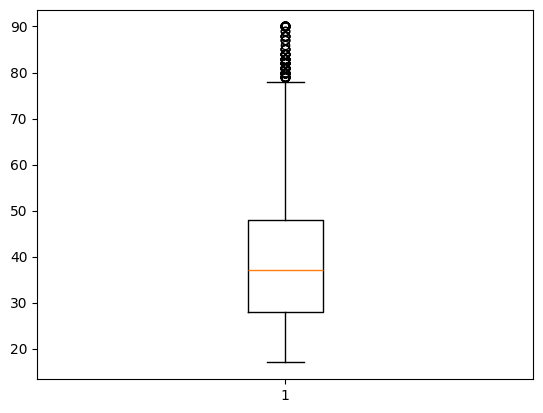

In [26]:
plt.boxplot(df['age'])
plt.show()

In [27]:
print(df['age'].value_counts())


age
36    1330
35    1328
33    1312
23    1307
31    1303
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64


In [28]:
df= df[df['age']<75]

In [29]:
print(df['age'].value_counts())


age
36    1330
35    1328
33    1312
23    1307
31    1303
34    1294
30    1268
28    1264
37    1254
38    1252
32    1234
41    1209
27    1208
29    1208
39    1193
24    1190
25    1176
40    1175
22    1161
42    1151
26    1138
20    1101
43    1086
45    1082
21    1081
46    1070
47    1057
44    1051
19    1041
51     861
18     853
50     848
49     835
48     829
52     717
53     688
55     609
54     595
17     590
56     551
58     539
57     526
59     515
60     433
61     430
62     386
63     323
64     321
65     275
67     232
66     231
68     170
69     144
70     130
72     113
71     111
73     102
74      70
Name: count, dtype: int64


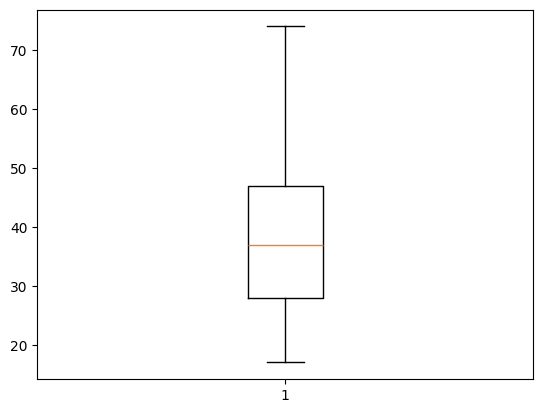

In [30]:
plt.boxplot(df['age'])
plt.show()

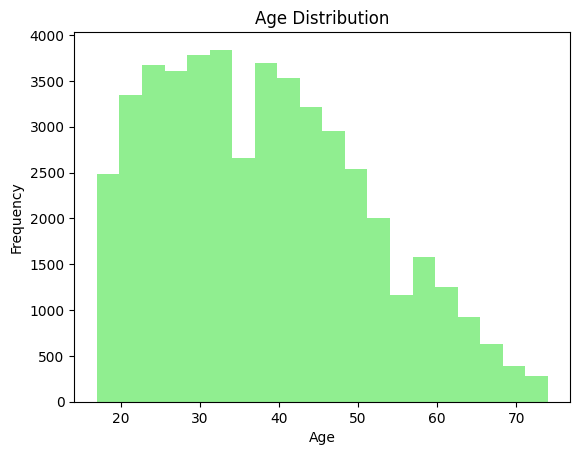

In [31]:
plt.hist(df['age'], bins=20, color='lightgreen')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

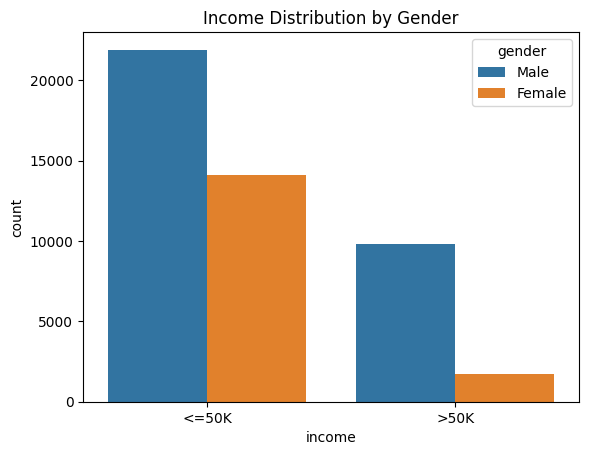

In [32]:
sns.countplot(x='income', hue='gender', data=df)
plt.title('Income Distribution by Gender')
plt.show()


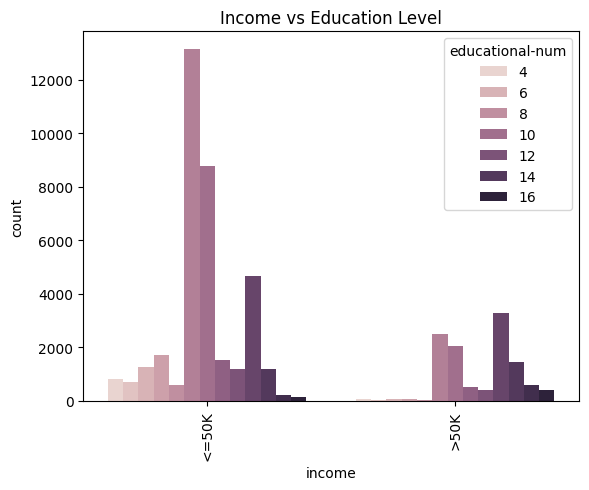

In [33]:
sns.countplot(x='income', hue='educational-num', data=df)
plt.title('Income vs Education Level')
plt.xticks(rotation=90)
plt.show()

In [34]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [35]:
#Label Encoding
encoder= LabelEncoder()
df.loc[:,'workclass']= encoder.fit_transform(df['workclass'])
df.loc[:,'marital-status']= encoder.fit_transform(df['marital-status'])
df.loc[:,'occupation']= encoder.fit_transform(df['occupation'])
df.loc[:,'relationship']= encoder.fit_transform(df['relationship'])
df.loc[:,'race']= encoder.fit_transform(df['race'])
df.loc[:,'gender']= encoder.fit_transform(df['gender'])
df.loc[:,'native-country']= encoder.fit_transform(df['native-country'])
df

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,7,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39,<=50K
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39,>50K
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39,<=50K
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39,<=50K


In [36]:
# Independant parameters
x= df.drop(columns=['income'])

#Target parameter
y= df['income']

In [37]:
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,4,6,3,2,1,0,0,40,39
1,38,3,89814,9,2,4,0,4,1,0,0,50,39
2,28,1,336951,12,2,11,0,4,1,0,0,40,39
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39
4,18,2,103497,10,4,7,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39


In [38]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 47551, dtype: object

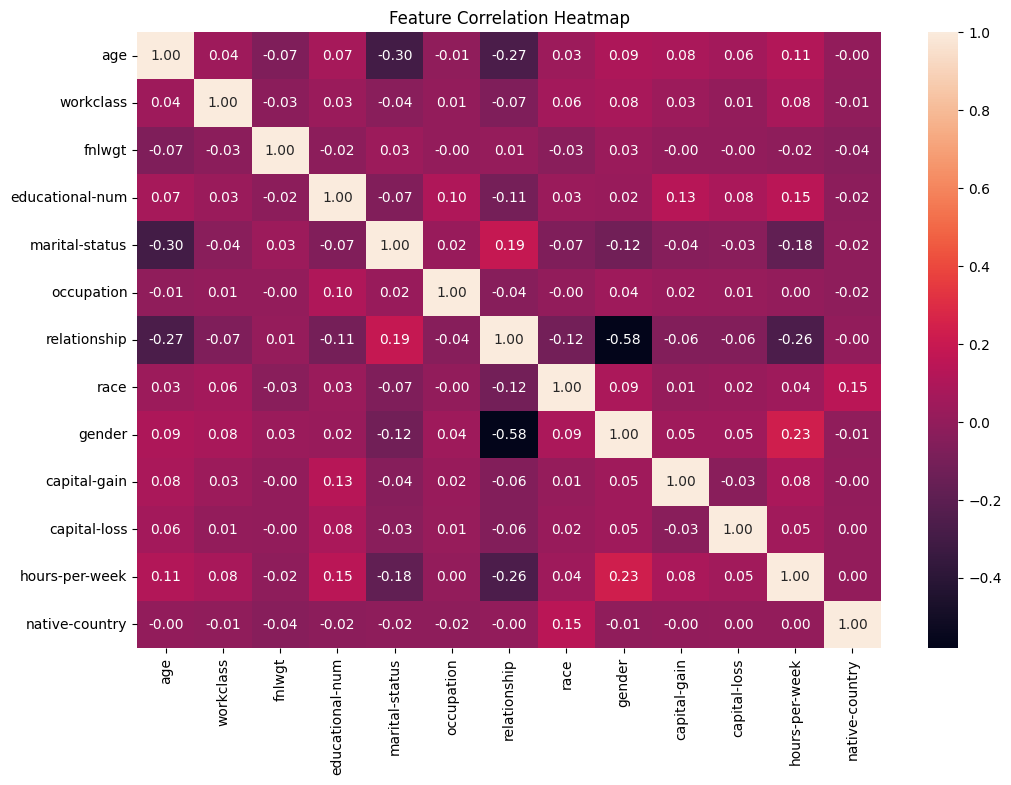

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(pd.DataFrame(x, columns=df.drop('income', axis=1).columns).corr(), annot=True, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [40]:
#Data Normalization
scaler= MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.14035088, 0.5       , 0.14512876, ..., 0.        , 0.39795918,
        0.95121951],
       [0.36842105, 0.5       , 0.05245126, ..., 0.        , 0.5       ,
        0.95121951],
       [0.19298246, 0.16666667, 0.21964867, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.71929825, 0.5       , 0.09446153, ..., 0.        , 0.39795918,
        0.95121951],
       [0.0877193 , 0.5       , 0.12800425, ..., 0.        , 0.19387755,
        0.95121951],
       [0.61403509, 0.66666667, 0.18648211, ..., 0.        , 0.39795918,
        0.95121951]], shape=(47551, 13))

In [41]:
xTrain, xTest, yTrain, yTest= train_test_split(x, y, test_size=0.2, random_state=25, stratify=y)

In [ ]:
#Model training

# knn= KNeighborsClassifier()
# knn.fit(xTrain, yTrain)
# prediction= knn.predict(xTest)
# accuracy_score(yTest, prediction)

0.8227315739669856

In [ ]:
# lr= LogisticRegression()
# lr.fit(xTrain, yTrain)
# prediction1= lr.predict(xTest)
# accuracy_score(yTest, prediction1)

0.8226264325517821

In [ ]:
# mlpc= MLPClassifier(solver='adam', hidden_layer_sizes=(13,7), random_state=2, max_iter=2000)
# mlpc.fit(xTrain, yTrain)
# prediction2= mlpc.predict(xTest)
# accuracy_score(yTest, prediction2)

0.8473346651245925

In [ ]:
models = {
    "RandomForest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(solver='adam', hidden_layer_sizes=(13, 7), random_state=2, max_iter=2000),
    "GradientBoosting": GradientBoostingClassifier(),
    # "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    # "LightGBM": LGBMClassifier(),
    # "CatBoost": CatBoostClassifier(verbose=0)
}

results = {}
best_model = None
best_accuracy = 0.0

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    pipe.fit(xTrain, yTrain)
    y_pred = pipe.predict(xTest)
    acc = accuracy_score(yTest, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(yTest, y_pred))

if acc > best_accuracy:
        best_accuracy = acc
        best_model = name

KNN Accuracy: 0.8293
              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      7195
        >50K       0.67      0.58      0.63      2316

    accuracy                           0.83      9511
   macro avg       0.77      0.75      0.76      9511
weighted avg       0.82      0.83      0.83      9511

LogisticRegression Accuracy: 0.8256
              precision    recall  f1-score   support

       <=50K       0.84      0.95      0.89      7195
        >50K       0.73      0.45      0.56      2316

    accuracy                           0.83      9511
   macro avg       0.79      0.70      0.72      9511
weighted avg       0.81      0.83      0.81      9511

MLPClassifier Accuracy: 0.8479
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      7195
        >50K       0.74      0.58      0.65      2316

    accuracy                           0.85      9511
   macro avg       0.81      0.76      0

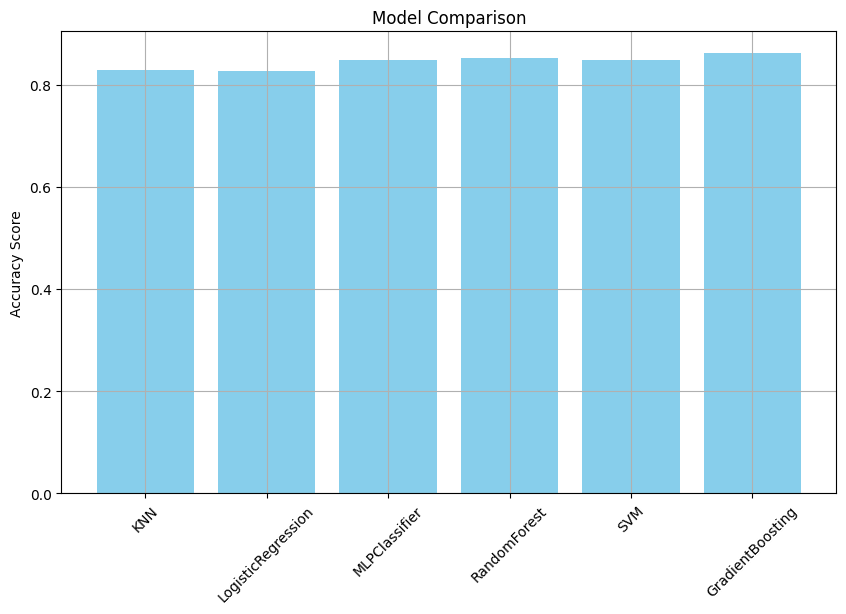

In [46]:
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [51]:
print(f"Best Performing Model: {best_model} with Accuracy: {best_accuracy*100:.4f}%")

Best Performing Model: GradientBoosting with Accuracy: 86.0898%
